In [12]:
import pypsa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from scipy.interpolate import griddata

# Design space

In [13]:
#CAES - energy capacity cost[1,10]
x_caes = 300
y_caes = 64
width_caes = 900
height_caes = 9
#PTES - energy capacity cost[4.4,50]
x_ptes = 1100
y_ptes = 37
width_ptes = 1800
height_ptes = 33
#LAES - energy capacity cost[130,580]
x_laes = 600
y_laes = 52
width_laes = 2200
height_laes = 18
#VRB - energy capacity cost[40,260]
x_vrb = 110
y_vrb = 65
width_vrb = 280
height_vrb = 13

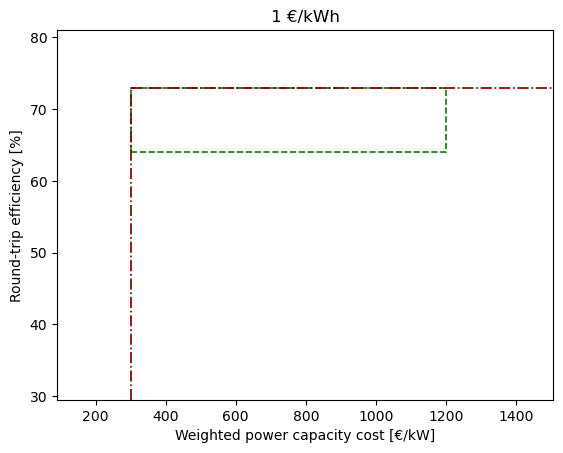

In [14]:
fig, ax = plt.subplots()
rect_caes = patches.Rectangle((x_caes,y_caes), width_caes, height_caes, linewidth=1.2,linestyle='--', facecolor='none',edgecolor='g')
ax.add_patch(rect_caes)
x_max = 1505
x_min = 90
y_max = 81
y_min = 29.5
ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)
ax.set_xlabel("Weighted power capacity cost [€/kW]")
ax.set_ylabel("Round-trip efficiency [%]")
ax.set_title("1 €/kWh")
plt.axvline(x=x_caes, ymin=0, ymax=1/(y_max-y_min)*(y_caes+height_caes-y_min), ls="-.", c="darkred", linewidth=1.25)
plt.axhline(y=y_caes+height_caes, xmin=1/(x_max-x_min)*(x_caes-x_min), ls="-.", c="darkred", linewidth=1.25)

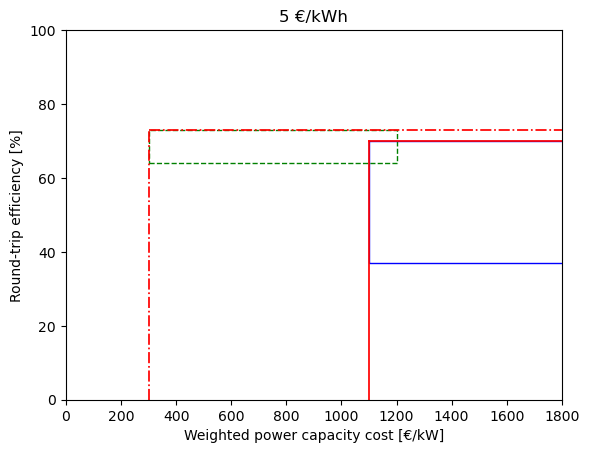

In [15]:
fig, ax= plt.subplots()
rect_caes = patches.Rectangle((x_caes,y_caes), width_caes, height_caes, linewidth=1,linestyle='--', facecolor='none',edgecolor='g')
rect_ptes = patches.Rectangle((x_ptes,y_ptes), width_ptes, height_ptes, linewidth=1,linestyle='-', facecolor='none',edgecolor='blue')
ax.add_patch(rect_caes)
ax.add_patch(rect_ptes)
ax.set_xlim(0,1800)
ax.set_ylim(0,100)
ax.set_xlabel("Weighted power capacity cost [€/kW]")
ax.set_ylabel("Round-trip efficiency [%]")
ax.set_title("5 €/kWh")
plt.axvline(x=x_caes, ymin=0, ymax=(y_caes+height_caes)/100, ls="-.", c="r", linewidth=1.25)
plt.axhline(y=y_caes+height_caes, xmin=1/1800*x_caes, ls="-.", c="r", linewidth=1.25)
plt.axvline(x=x_ptes, ymin=0, ymax=(y_ptes+height_ptes)/100, ls="-", c="r", linewidth=1.25)
plt.axhline(y=y_ptes+height_ptes, xmin=1/1800*x_ptes, ls="-", c="r", linewidth=1.25)

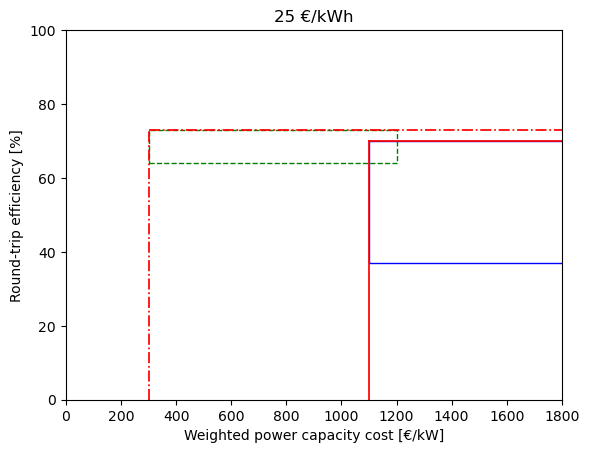

In [16]:
fig, ax = plt.subplots()
rect_caes = patches.Rectangle((x_caes,y_caes), width_caes, height_caes, linewidth=1,linestyle='--', facecolor='none',edgecolor='g')
rect_ptes = patches.Rectangle((x_ptes,y_ptes), width_ptes, height_ptes, linewidth=1,linestyle='-', facecolor='none',edgecolor='blue')
ax.add_patch(rect_caes)
ax.add_patch(rect_ptes)
ax.set_xlim(0,1800)
ax.set_ylim(0,100)
ax.set_xlabel("Weighted power capacity cost [€/kW]")
ax.set_ylabel("Round-trip efficiency [%]")
ax.set_title("25 €/kWh")
plt.axvline(x=x_caes, ymin=0, ymax=(y_caes+height_caes)/100, ls="-.", c="r", linewidth=1.25)
plt.axhline(y=y_caes+height_caes, xmin=1/1800*x_caes, ls="-.", c="r", linewidth=1.25)
plt.axvline(x=x_ptes, ymin=0, ymax=(y_ptes+height_ptes)/100, ls="-", c="r", linewidth=1.25)
plt.axhline(y=y_ptes+height_ptes, xmin=1/1800*x_ptes, ls="-", c="r", linewidth=1.25)

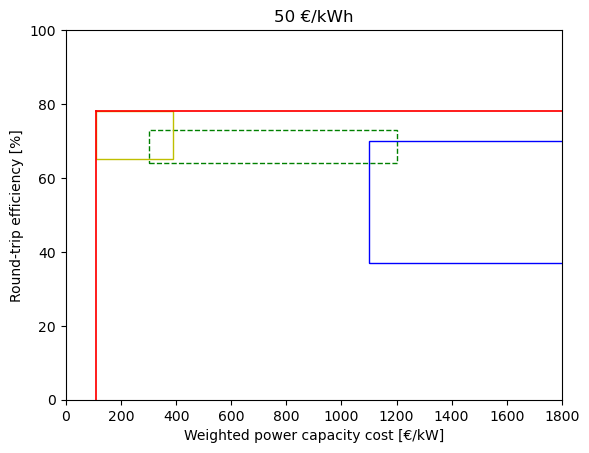

In [17]:
fig, ax = plt.subplots()
rect_caes = patches.Rectangle((x_caes,y_caes), width_caes, height_caes, linewidth=1,linestyle='--', facecolor='none',edgecolor='g')
rect_ptes = patches.Rectangle((x_ptes,y_ptes), width_ptes, height_ptes, linewidth=1,linestyle='-', facecolor='none',edgecolor='blue')
rect_vrb = patches.Rectangle((x_vrb,y_vrb), width_vrb, height_vrb, linewidth=1,linestyle='-', facecolor='none',edgecolor='y')
ax.add_patch(rect_caes)
ax.add_patch(rect_ptes)
ax.add_patch(rect_vrb)
ax.set_xlim(0,1800)
ax.set_ylim(0,100)
ax.set_xlabel("Weighted power capacity cost [€/kW]")
ax.set_ylabel("Round-trip efficiency [%]")
ax.set_title("50 €/kWh")
# plt.axvline(x=x_caes, ymin=0, ymax=(y_caes+height_caes)/100, ls="-.", c="r", linewidth=1.25) -> solid line is before dot line
# plt.axhline(y=y_caes+height_caes, xmin=1/1800*x_caes, ls="-.", c="r", linewidth=1.25)
plt.axvline(x=x_vrb, ymin=0, ymax=(y_vrb+height_vrb)/100, ls="-", c="r", linewidth=1.25)
plt.axhline(y=y_vrb+height_vrb, xmin=1/1800*x_vrb, ls="-", c="r", linewidth=1.25)

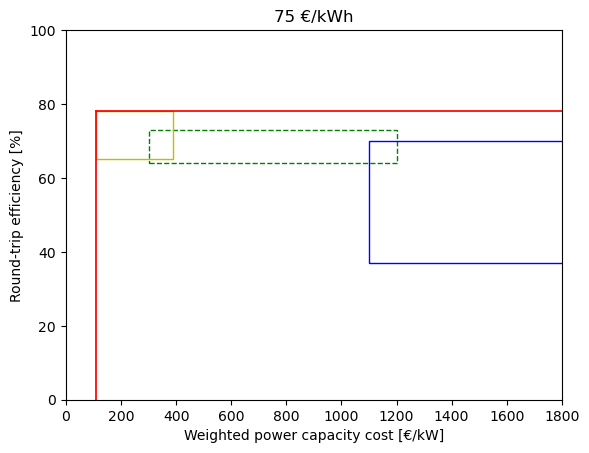

In [18]:
fig, ax = plt.subplots()
rect_caes = patches.Rectangle((x_caes,y_caes), width_caes, height_caes, linewidth=1,linestyle='--', facecolor='none',edgecolor='g')
rect_ptes = patches.Rectangle((x_ptes,y_ptes), width_ptes, height_ptes, linewidth=1,linestyle='-', facecolor='none',edgecolor='blue')
rect_vrb = patches.Rectangle((x_vrb,y_vrb), width_vrb, height_vrb, linewidth=1,linestyle='-', facecolor='none',edgecolor='y')
ax.add_patch(rect_caes)
ax.add_patch(rect_ptes)
ax.add_patch(rect_vrb)
ax.set_xlim(0,1800)
ax.set_ylim(0,100)
ax.set_xlabel("Weighted power capacity cost [€/kW]")
ax.set_ylabel("Round-trip efficiency [%]")
ax.set_title("75 €/kWh")
plt.axvline(x=x_vrb, ymin=0, ymax=(y_vrb+height_vrb)/100, ls="-", c="r", linewidth=1.25)
plt.axhline(y=y_vrb+height_vrb, xmin=1/1800*x_vrb, ls="-", c="r", linewidth=1.25)

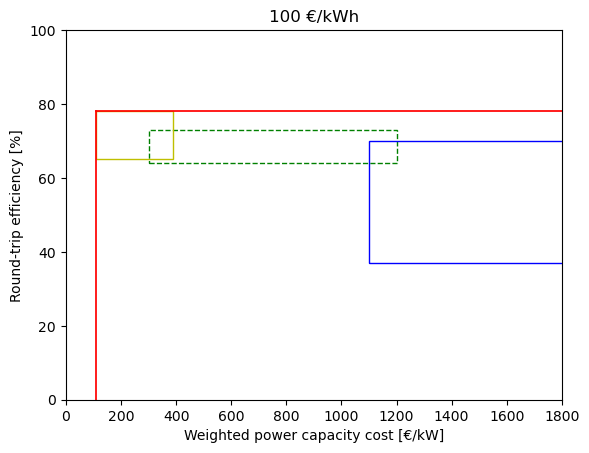

In [19]:
fig, ax = plt.subplots()
rect_caes = patches.Rectangle((x_caes,y_caes), width_caes, height_caes, linewidth=1,linestyle='--', facecolor='none',edgecolor='g')
rect_ptes = patches.Rectangle((x_ptes,y_ptes), width_ptes, height_ptes, linewidth=1,linestyle='-', facecolor='none',edgecolor='blue')
rect_vrb = patches.Rectangle((x_vrb,y_vrb), width_vrb, height_vrb, linewidth=1,linestyle='-', facecolor='none',edgecolor='y')
ax.add_patch(rect_caes)
ax.add_patch(rect_ptes)
ax.add_patch(rect_vrb)
ax.set_xlim(0,1800)
ax.set_ylim(0,100)
ax.set_xlabel("Weighted power capacity cost [€/kW]")
ax.set_ylabel("Round-trip efficiency [%]")
ax.set_title("100 €/kWh")
plt.axvline(x=x_vrb, ymin=0, ymax=(y_vrb+height_vrb)/100, ls="-", c="r", linewidth=1.25)
plt.axhline(y=y_vrb+height_vrb, xmin=1/1800*x_vrb, ls="-", c="r", linewidth=1.25)

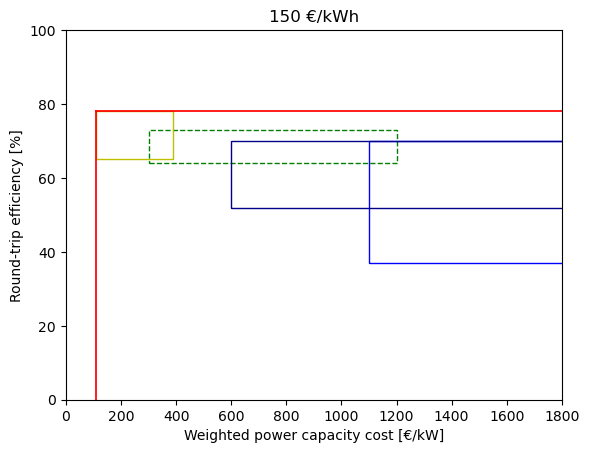

In [20]:
fig, ax = plt.subplots()
rect_caes = patches.Rectangle((x_caes,y_caes), width_caes, height_caes, linewidth=1,linestyle='--', facecolor='none',edgecolor='g')
rect_ptes = patches.Rectangle((x_ptes,y_ptes), width_ptes, height_ptes, linewidth=1,linestyle='-', facecolor='none',edgecolor='blue')
rect_laes = patches.Rectangle((x_laes,y_laes), width_laes, height_laes, linewidth=1,linestyle='-', facecolor='none',edgecolor='darkblue')
rect_vrb = patches.Rectangle((x_vrb,y_vrb), width_vrb, height_vrb, linewidth=1,linestyle='-', facecolor='none',edgecolor='y')
ax.add_patch(rect_caes)
ax.add_patch(rect_ptes)
ax.add_patch(rect_laes)
ax.add_patch(rect_vrb)
ax.set_xlim(0,1800)
ax.set_ylim(0,100)
ax.set_xlabel("Weighted power capacity cost [€/kW]")
ax.set_ylabel("Round-trip efficiency [%]")
ax.set_title("150 €/kWh")
plt.axvline(x=x_vrb, ymin=0, ymax=(y_vrb+height_vrb)/100, ls="-", c="r", linewidth=1.25)
plt.axhline(y=y_vrb+height_vrb, xmin=1/1800*x_vrb, ls="-", c="r", linewidth=1.25)

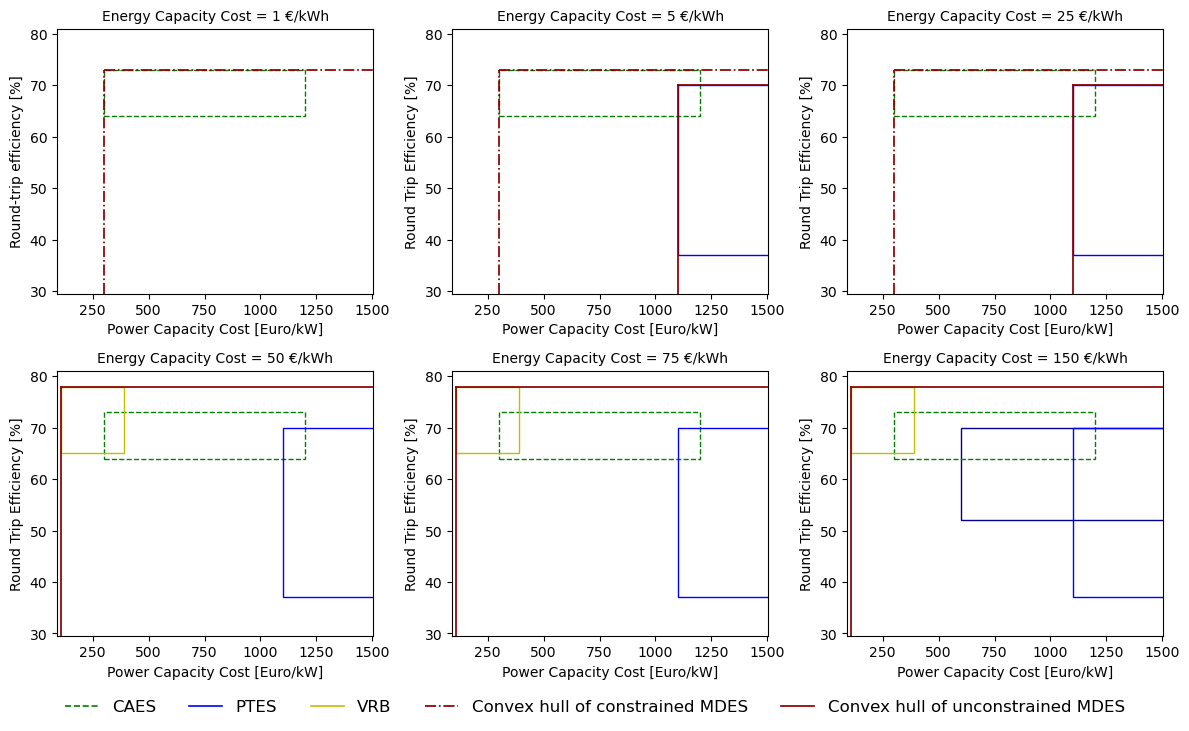

In [21]:
from matplotlib.lines import Line2D
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 7))

x_max = 1505
x_min = 90
y_max = 81
y_min = 29.5

# create the first subplot
rect_caes1 = patches.Rectangle((x_caes,y_caes), width_caes, height_caes, linewidth=1,linestyle='--', facecolor='none',edgecolor='g')
ax1.add_patch(rect_caes1)
ax1.set_xlim(x_min,x_max)
ax1.set_ylim(y_min,y_max)
ax1.set_xlabel("Power Capacity Cost [Euro/kW]")
ax1.set_ylabel("Round-trip efficiency [%]")
ax1.set_title("Energy Capacity Cost = 1 €/kWh", fontsize=10)
ax1.axvline(x=x_caes, ymin=0, ymax=1/(y_max-y_min)*(y_caes+height_caes-y_min), ls="-.", c="darkred", linewidth=1.25)
ax1.axhline(y=y_caes+height_caes, xmin=1/(x_max-x_min)*(x_caes-x_min), ls="-.", c="darkred", linewidth=1.25)

# create the second subplot
rect_caes2 = patches.Rectangle((x_caes,y_caes), width_caes, height_caes, linewidth=1,linestyle='--', facecolor='none',edgecolor='g')
rect_ptes2 = patches.Rectangle((x_ptes,y_ptes), width_ptes, height_ptes, linewidth=1,linestyle='-', facecolor='none',edgecolor='blue')
ax2.add_patch(rect_caes2)
ax2.add_patch(rect_ptes2)
ax2.set_xlabel('Power Capacity Cost [Euro/kW]')
ax2.set_ylabel('Round Trip Efficiency [%]')
ax2.set_title('Energy Capacity Cost = 5 €/kWh', fontsize=10)
ax2.set_xlim(x_min,x_max)
ax2.set_ylim(y_min,y_max)
ax2.axvline(x=x_caes, ymin=0, ymax=1/(y_max-y_min)*(y_caes+height_caes-y_min), ls="-.", c="darkred", linewidth=1.25)
ax2.axhline(y=y_caes+height_caes, xmin=1/(x_max-x_min)*(x_caes-x_min), ls="-.", c="darkred", linewidth=1.25)
ax2.axvline(x=x_ptes, ymin=0, ymax=1/(y_max-y_min)*(y_ptes+height_ptes-y_min), ls="-", c="darkred", linewidth=1.25)
ax2.axhline(y=y_ptes+height_ptes, xmin=1/(x_max-x_min)*(x_ptes-x_min), ls="-", c="darkred", linewidth=1.25)

# create the third subplot
rect_caes3 = patches.Rectangle((x_caes,y_caes), width_caes, height_caes, linewidth=1,linestyle='--', facecolor='none',edgecolor='g')
rect_ptes3 = patches.Rectangle((x_ptes,y_ptes), width_ptes, height_ptes, linewidth=1,linestyle='-', facecolor='none',edgecolor='blue')
ax3.add_patch(rect_caes3)
ax3.add_patch(rect_ptes3)
ax3.set_xlabel('Power Capacity Cost [Euro/kW]')
ax3.set_ylabel('Round Trip Efficiency [%]')
ax3.set_title('Energy Capacity Cost = 25 €/kWh', fontsize=10)
ax3.set_xlim(x_min,x_max)
ax3.set_ylim(y_min,y_max)
ax3.axvline(x=x_caes, ymin=0, ymax=1/(y_max-y_min)*(y_caes+height_caes-y_min), ls="-.", c="darkred", linewidth=1.25)
ax3.axhline(y=y_caes+height_caes, xmin=1/(x_max-x_min)*(x_caes-x_min), ls="-.", c="darkred", linewidth=1.25)
ax3.axvline(x=x_ptes, ymin=0, ymax=1/(y_max-y_min)*(y_ptes+height_ptes-y_min), ls="-", c="darkred", linewidth=1.25)
ax3.axhline(y=y_ptes+height_ptes, xmin=1/1/(x_max-x_min)*(x_ptes-x_min), ls="-", c="darkred", linewidth=1.25)

# create the fourth subplot
rect_caes4 = patches.Rectangle((x_caes,y_caes), width_caes, height_caes, linewidth=1,linestyle='--', facecolor='none',edgecolor='g')
rect_ptes4 = patches.Rectangle((x_ptes,y_ptes), width_ptes, height_ptes, linewidth=1,linestyle='-', facecolor='none',edgecolor='blue')
rect_vrb4 = patches.Rectangle((x_vrb,y_vrb), width_vrb, height_vrb, linewidth=1,linestyle='-', facecolor='none',edgecolor='y')
ax4.add_patch(rect_caes4)
ax4.add_patch(rect_ptes4)
ax4.add_patch(rect_vrb4)
ax4.set_xlabel('Power Capacity Cost [Euro/kW]')
ax4.set_ylabel('Round Trip Efficiency [%]')
ax4.set_title('Energy Capacity Cost = 50 €/kWh', fontsize=10)
ax4.set_xlim(x_min,x_max)
ax4.set_ylim(y_min,y_max)
ax4.axvline(x=x_vrb, ymin=0, ymax=1/(y_max-y_min)*(y_vrb+height_vrb-y_min), ls="-", c="darkred", linewidth=1.25)
ax4.axhline(y=y_vrb+height_vrb, xmin=1/(x_max-x_min)*(x_vrb-x_min), ls="-", c="darkred", linewidth=1.25)

# create the fifth subplot
rect_caes5 = patches.Rectangle((x_caes,y_caes), width_caes, height_caes, linewidth=1,linestyle='--', facecolor='none',edgecolor='g')
rect_ptes5 = patches.Rectangle((x_ptes,y_ptes), width_ptes, height_ptes, linewidth=1,linestyle='-', facecolor='none',edgecolor='blue')
rect_vrb5 = patches.Rectangle((x_vrb,y_vrb), width_vrb, height_vrb, linewidth=1,linestyle='-', facecolor='none',edgecolor='y')
ax5.add_patch(rect_caes5)
ax5.add_patch(rect_ptes5)
ax5.add_patch(rect_vrb5)
ax5.set_xlabel('Power Capacity Cost [Euro/kW]')
ax5.set_ylabel('Round Trip Efficiency [%]')
ax5.set_title('Energy Capacity Cost = 75 €/kWh', fontsize=10)
ax5.set_xlim(x_min,x_max)
ax5.set_ylim(y_min,y_max)
ax5.axvline(x=x_vrb, ymin=0, ymax=1/(y_max-y_min)*(y_vrb+height_vrb-y_min), ls="-", c="darkred", linewidth=1.25)
ax5.axhline(y=y_vrb+height_vrb, xmin=1/(x_max-x_min)*(x_vrb-x_min), ls="-", c="darkred", linewidth=1.25)

# create the sixth subplot
rect_laes6 = patches.Rectangle((x_laes,y_laes), width_laes, height_laes, linewidth=1,linestyle='-', facecolor='none',edgecolor='darkblue')
rect_caes6 = patches.Rectangle((x_caes,y_caes), width_caes, height_caes, linewidth=1,linestyle='--', facecolor='none',edgecolor='g')
rect_ptes6 = patches.Rectangle((x_ptes,y_ptes), width_ptes, height_ptes, linewidth=1,linestyle='-', facecolor='none',edgecolor='blue')
rect_vrb6 = patches.Rectangle((x_vrb,y_vrb), width_vrb, height_vrb, linewidth=1,linestyle='-', facecolor='none',edgecolor='y')
ax6.add_patch(rect_laes6)
ax6.add_patch(rect_caes6)
ax6.add_patch(rect_ptes6)
ax6.add_patch(rect_vrb6)
ax6.set_xlabel('Power Capacity Cost [Euro/kW]')
ax6.set_ylabel('Round Trip Efficiency [%]')
ax6.set_title('Energy Capacity Cost = 150 €/kWh', fontsize=10)
ax6.set_xlim(x_min,x_max)
ax6.set_ylim(y_min,y_max)
ax6.axvline(x=x_vrb, ymin=0, ymax=1/(y_max-y_min)*(y_vrb+height_vrb-y_min), ls="-", c="darkred", linewidth=1.25)
ax6.axhline(y=y_vrb+height_vrb, xmin=1/(x_max-x_min)*(x_vrb-x_min), ls="-", c="darkred", linewidth=1.25)

# Create custom legend entries
legend_elements = [Line2D([0], [0], color='g', linewidth=1.2, linestyle='--', label='CAES'),
                   Line2D([0], [0], color='blue', linewidth=1.2, linestyle='-', label='PTES'),
                   Line2D([0], [0], color='y', linewidth=1.2, linestyle='-', label='VRB'),
                   Line2D([0], [0], color='darkred',linewidth=1.25, ls="-.", label='Convex hull of constrained MDES'),
                   Line2D([0], [0], color='darkred',linewidth=1.25, ls="-", label='Convex hull of unconstrained MDES')]
# Create the legend
fig.legend(handles=legend_elements,ncol=5,loc='lower center', bbox_to_anchor=(0.5, -0.05), fontsize=12, frameon=False)

plt.subplots_adjust(hspace=0.3,bottom=0.25)
    
plt.tight_layout()
plt.savefig("design space with feasible regions.pdf", dpi=750, bbox_inches='tight')
plt.show()
